# The Relationship of Average Income and Voter Preferences in Canada

### Group 47: Farrah Chan

## PART I: Introduction

**Relevant background**

Political parties play a large role in promoting participation from citizens in Canadian democracy and representing their needs. The Canadian government is formed by a number of political parties that make up the House of Commons. Federal elections happen every 4 years to determine the distribution of seats for each party, each seat represents their respective constituencies. The proportion of seats to parties determine which party leads the government, as the party with the most seats is able to select the Prime Minister. 

Analyses surrounding voting results and behaviour are commonly viewed in comparison to factors such as age, province, and livelihood. In this project we want to explore the relationship between who people voted for in 2015 and their average income level that year. Most of us assume that each party appeals to a specific demographic, and creates legislation that benefits them. Hence, we plan on analyzing how each electoral district voted in comparison to the average income to derive if there is a trend in increase in income and party preference. 

Assuming that income distribution is a large factor for voting decisions among citizens when choosing their representatives, we intend to seek evidence of this relationship between income and vote proportions per party. 


<br>

**Question**

Does a correlation exist between the average income of electoral districts and the voting outcomes for the 5 largest political parties in Canada?

<br>

**Methods:**

In this project, we referred to two separate data sets provided by the Canadian government in 2015: the Federal Electoral District Tax Statistics (FEDS) which provides data on the average income levels of the electoral districts, and the 42nd general election: Official Voting Results for the 2015 election results for each district. 

We plan to create scatterplots for each political party with income levels on the x-axis and the percentage of votes the party received within the electoral district (%) on the y-axis. Each point will represent an electoral district and we will use the distribution of the points to analyze any  patterns in regards to an increase or decrease in income and voter preference. In this analysis we will be removing the variable of time by keeping it as a static analysis of 2015 election results. 

Initially we planned to explore this relationship between the Liberal, Conservative, NDP, Green and Bloc Quebecois parties of Canada. After further consideration we decided to remove Bloc Quebecois from our project as it is a geographically-centralized party and the votes received are largely due to Quebec-separatist rhetoric, with income most likely not a driving factor. Due to possible complications such as selection bias and centralization in Quebec, Bloc Quebecois is not an option for most electoral districts.



In [46]:
#Run this cell first
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')



Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Part II: Methods

### Import Income Data

In [47]:
income_data <- read_csv(file = "https://drive.google.com/uc?export=download&id=1zEZSQiKbsvp0ejxJ6gYr0-lkBN3TI3XB") |>
    rename("Electoral_District_ID" = "FED ID", "Federal_Electoral_Districts" = "Federal Electoral Districts") |>
    filter(!is.na(Electoral_District_ID))
income_data

Rows: 984 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Federal Electoral Districts
dbl (4): Prov/Terr, FED ID, Total, Total Income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Prov/Terr,Electoral_District_ID,Federal_Electoral_Districts,Total,Total Income
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
10,10001,Avalon,72030,3433042000
10,10002,Bonavista--Burin--Trinity,64180,2487091000
10,10003,Coast of Bays--Central--Notre Dame,66890,2545490000
⋮,⋮,⋮,⋮,⋮
60,60001,Yukon,28010,1511702000
61,61001,Northwest Territories,31850,1962928000
62,62001,Nunavut,21050,1026526000


### Import Election Data

In [48]:
election_data <- read_csv("https://drive.google.com/uc?export=download&id=1bn-_WWwhwtmyZwGG_7G9nKCZK2fMFuyq")

colnames(election_data) = c("Province", "Electoral_District", "Electoral_District_ID", "Party", "Percentage_of_Votes_Obtained")

election_data <- filter(election_data, !is.na(Party)) |>
    pivot_wider(names_from = Party, values_from = Percentage_of_Votes_Obtained)
election_data

Rows: 1883 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Province, Electoral District Name/Nom de circonscription, Candidate...
dbl (2): Electoral District Number/Numéro de circonscription, Percentage of ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Province,Electoral_District,Electoral_District_ID,Liberal,NDP,Conservative,Green Party,Bloc Quebecois
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Newfoundland and Labrador/Terre-Neuve-et-Labrador,Avalon,10001,55.9,14.4,11.1,0.5,NA
Newfoundland and Labrador/Terre-Neuve-et-Labrador,Bonavista--Burin--Trinity,10002,81.8,7.3,10.1,0.8,NA
Newfoundland and Labrador/Terre-Neuve-et-Labrador,Coast of Bays--Central--Notre Dame,10003,74.8,6.1,18.3,0.8,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yukon,Yukon,60001,53.7,19.4,24.3,2.6,NA
Northwest Territories/Territoires du Nord-Ouest,Northwest Territories/Territoires du Nord-Ouest,61001,48.3,30.5,18.3,2.8,NA
Nunavut,Nunavut,62001,47.1,26.6,24.8,1.5,NA


### Merge Datasets Using Electoral District ID

In [49]:
# Setting up the data frames
# all_data <- entire data set
# Conservative_data
# Liberal_data
# NDP_data
# Green_data
# Bloc_data

all_data <- merge(election_data, income_data, by = "Electoral_District_ID") |>
    rename("Total_Income" = "Total Income", 
           "Green" = "Green Party",
           "Bloc" = "Bloc Quebecois",
           "Prov" = "Prov/Terr") |>
    mutate(Average_Income = Total_Income/Total) |>
    select(-Federal_Electoral_Districts, -Province, -Prov)
#all_data

Conservative_data <- select(all_data, Average_Income, Conservative) |>
rename(Percentage_of_Population_Voted = Conservative)
Conservative_data

Liberal_data <- select(all_data, Average_Income, Liberal) |>
rename(Percentage_of_Population_Voted = Liberal)
head(Liberal_data)

NDP_data <- select(all_data, Average_Income, NDP)|>
rename(Percentage_of_Population_Voted = NDP)
#NDP_data

Green_data <- select(all_data, Average_Income, Green)|>
rename(Percentage_of_Population_Voted = Green)
#Green_data

Bloc_data <- select(all_data, Average_Income, Bloc)|>
rename(Percentage_of_Population_Voted = Bloc)
#Bloc_data

Average_Income,Percentage_of_Population_Voted
<dbl>,<dbl>
47661.28,11.1
38751.81,10.1
38054.87,18.3
⋮,⋮
53970.08,24.3
61630.39,18.3
48766.08,24.8


,Average_Income,Percentage_of_Population_Voted
,<dbl>,<dbl>
1,47661.28,55.9
2,38751.81,81.8
3,38054.87,74.8
4,57845.26,71.8
5,37906.99,73.9
6,57108.84,46.7


### Plot each scatter plot relating to the party

Conservative_Plot <- ggplot(Conservative_data, aes (x = Average_Income, y = Percentage_of_Population_Voted)) + 
                            geom_point() + 
                            labs(x = "Average Income", y = "Percent Voted") +
                            ggtitle("Conservative")
#Conservative_Plot

Liberal_Plot <- ggplot(Liberal_data, aes (x = Average_Income, y = Percentage_of_Population_Voted)) + 
                            geom_point() + 
                            labs(x = "Average Income", y = "Percent Voted") +
                            ggtitle("Liberal")
#Liberal_Plot

NDP_Plot <- ggplot(NDP_data, aes (x = Average_Income, y = Percentage_of_Population_Voted)) + 
                            geom_point() + 
                            labs(x = "Average Income", y = "Percent Voted") +
                            ggtitle("NDP")
#NDP_Plot

Green_Plot <- ggplot(Green_data, aes (x = Average_Income, y = Percentage_of_Population_Voted)) + 
                            geom_point() + 
                            labs(x = "Average Income", y = "Percent Voted") +
                            ggtitle("Green")
#Green_Plot

Bloc_Plot <- ggplot(Bloc_data, aes (x = Average_Income, y = Percentage_of_Population_Voted)) + 
                            geom_point() + 
                            labs(x = "Average Income", y = "Percent Voted") +
                            ggtitle("Bloc")
#Bloc_Plot


### CONSERVATIVE DATA

In [50]:
set.seed(200)

Conservative_split <- initial_split(Conservative_data, prop = 0.75, strata = Percentage_of_Population_Voted)
Conservative_training <- training(Conservative_split)
Conservative_testing <- testing(Conservative_split)


Conservative_training

,Average_Income,Percentage_of_Population_Voted
,<dbl>,<dbl>
1,47661.28,11.1
4,57845.26,13.9
5,37906.99,12.2
⋮,⋮,⋮
317,55219.35,52.5
318,38776.96,44.2
323,60489.55,44.0


In [51]:

Conservative_recipe <- recipe(Percentage_of_Population_Voted ~ Average_Income, data = Conservative_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Conservative_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

Conservative_vfold <- vfold_cv(Conservative_training, v = 5, strata = Percentage_of_Population_Voted)

Conservative_wkflw <- workflow() |>
  add_recipe(Conservative_recipe) |>
  add_model(Conservative_spec)

Conservative_wkflw


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [52]:
gridvals <- tibble(neighbors = seq(1,200))

Conservative_results <- Conservative_wkflw |>
  tune_grid(resamples = Conservative_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
Conservative_results

! Fold1: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold1: internal: A correlation computation is required, but the inputs are size zero or o...

! Fold2: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold2: internal: A correlation computation is required, but the inputs are size zero or o...

! Fold3: preprocessor 1/1, model 1/1: 200 samples were requested but there were 201 rows in the data. 196 will...

! Fold4: preprocessor 1/1, model 1/1: 200 samples were requested but there were 203 rows in the data. 198 will...

! Fold5: preprocessor 1/1, model 1/1: 200 samples were requested but there were 204 rows in the data. 199 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,22.96855,5,0.9905304,Preprocessor1_Model001
2,rmse,standard,21.00272,5,0.4763696,Preprocessor1_Model002
3,rmse,standard,19.65852,5,0.6583350,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,rmse,standard,17.32874,5,0.7300267,Preprocessor1_Model198
199,rmse,standard,16.91528,3,0.3132629,Preprocessor1_Model199
200,rmse,standard,17.32165,5,0.7272020,Preprocessor1_Model200


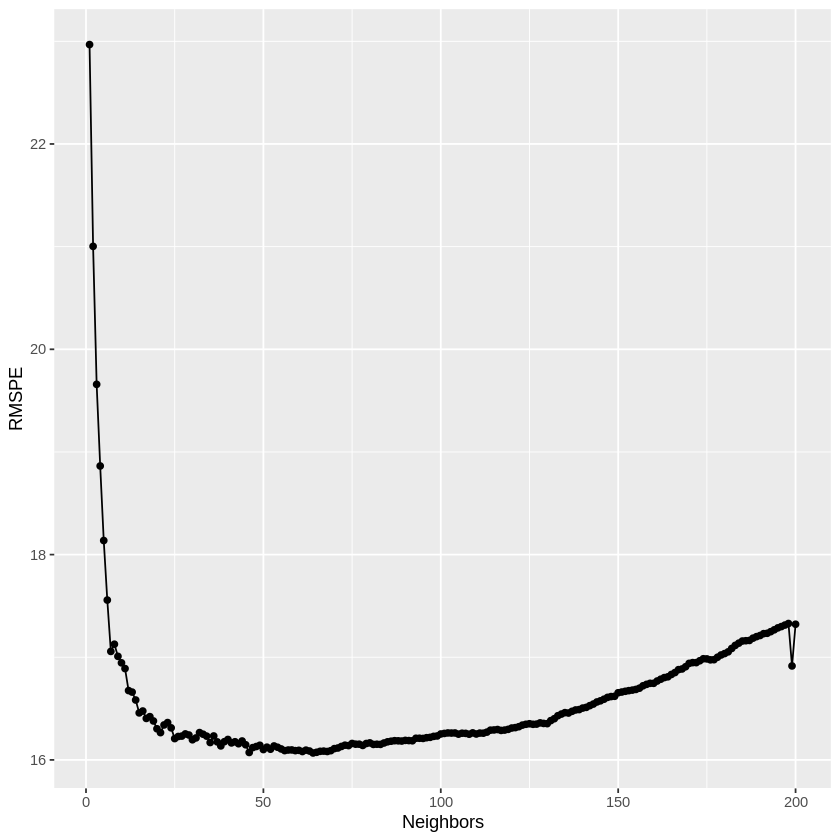

In [53]:
Conservative_RMSPE_plot <- ggplot(Conservative_results, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
xlab("Neighbors") +
ylab("RMSPE")

Conservative_RMSPE_plot

In [54]:
# show only the row of minimum RMSPE
Conservative_min <- Conservative_results |>
  filter(mean == min(mean))

Conservative_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
64,rmse,standard,16.06736,5,0.5068667,Preprocessor1_Model064


The smallest RMSPE occurs when K = 64.

In [55]:
kmin <- Conservative_min |> pull(neighbors)

Conservative_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

Conservative_fit_test <- workflow() |>
  add_recipe(Conservative_recipe) |>
  add_model(Conservative_spec_test) |>
  fit(data = Conservative_training)

Conservative_summary_test <- Conservative_fit_test |>
  predict(Conservative_testing) |>
  bind_cols(Conservative_testing) |>
  metrics(truth = Percentage_of_Population_Voted, estimate = .pred) |>
  filter(.metric == 'rmse')

Conservative_summary_test


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,14.30949


Warning message:
“Removed 1 rows containing missing values (geom_point).”


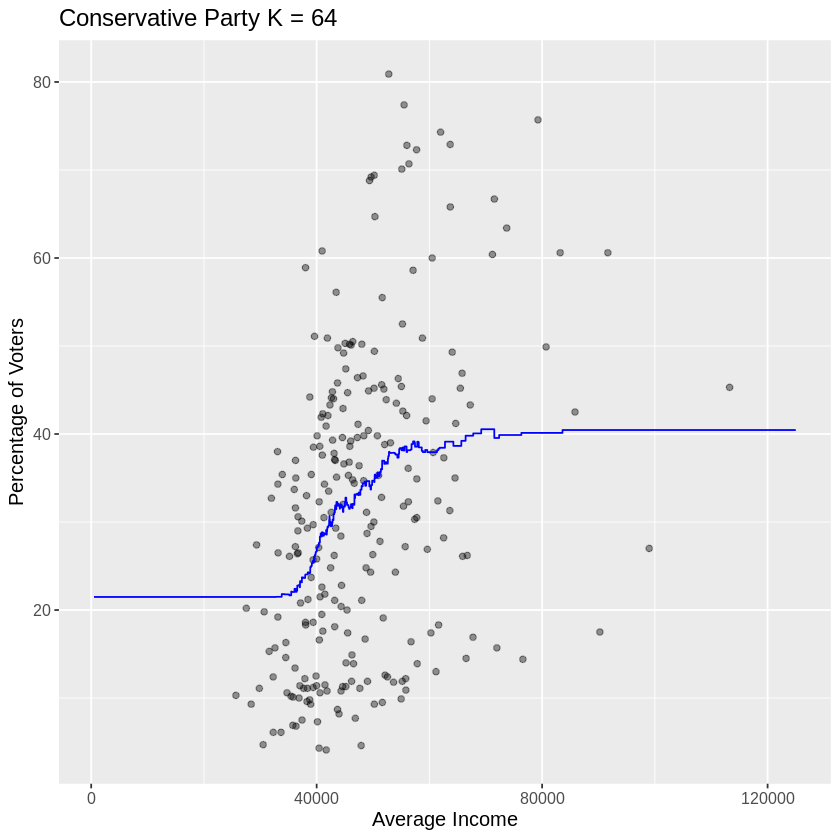

In [56]:
Conservative_preds <- tibble(Average_Income = seq(from = 500, to = 125000, by = 10))

Conservative_preds <- Conservative_fit_test |>
  predict(Conservative_preds) |>
  bind_cols(Conservative_preds)

plot_final_con <- ggplot(Conservative_training, aes(x = Average_Income, y = Percentage_of_Population_Voted)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Conservative_preds, 
            mapping = aes(x = Average_Income, y = .pred), 
            color = "blue") +
  xlab("Average Income") +
  ylab("Percentage of Voters") +
  ggtitle(paste0("Conservative Party K = ", kmin)) + 
  theme(text = element_text(size = 12))

plot_final_con

### LIBERAL

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


! Fold1: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold2: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold3: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold4: preprocessor 1/1, model 1/1: 200 samples were requested but there were 204 rows in the data. 199 will...

! Fold5: preprocessor 1/1, model 1/1: 200 samples were requested but there were 204 rows in the data. 199 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,17.89318,5,0.4994864,Preprocessor1_Model001
2,rmse,standard,16.34126,5,0.5458242,Preprocessor1_Model002
3,rmse,standard,15.92175,5,0.7358229,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,rmse,standard,14.13072,5,0.3086600,Preprocessor1_Model198
199,rmse,standard,14.13233,5,0.3071815,Preprocessor1_Model199
200,rmse,standard,14.13093,5,0.3057875,Preprocessor1_Model200


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
43,rmse,standard,13.78565,5,0.3941599,Preprocessor1_Model043


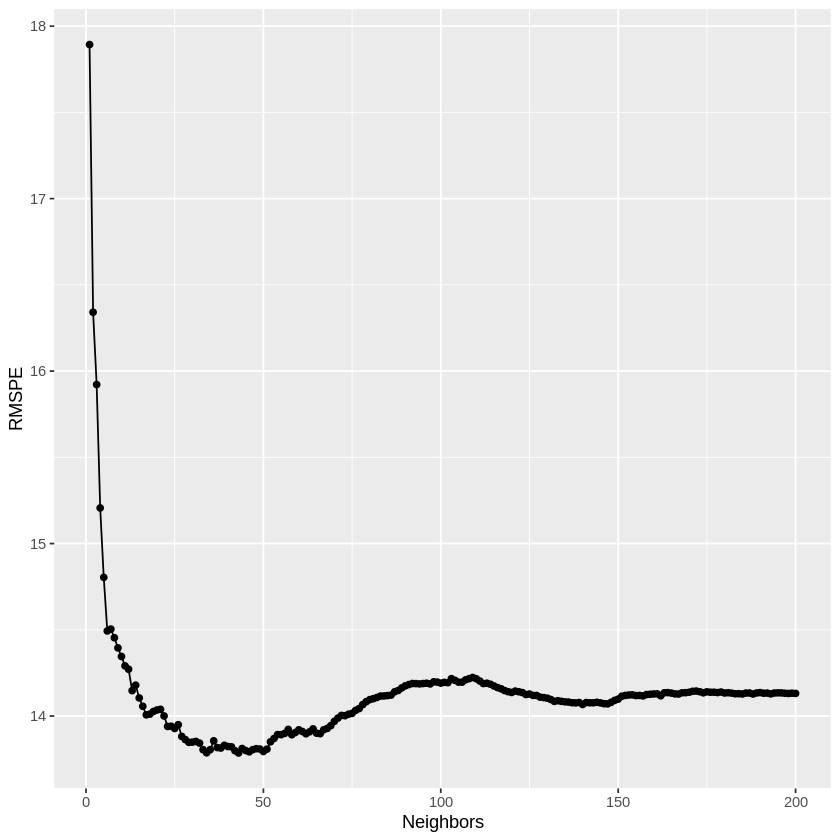

In [57]:
set.seed(200)

# Splitting into testing and training

Liberal_split <- initial_split(Liberal_data, prop = 0.75, strata = Percentage_of_Population_Voted)
Liberal_training <- training(Liberal_split)
Liberal_testing <- testing(Liberal_split)

#


Liberal_recipe <- recipe(Percentage_of_Population_Voted ~ Average_Income, data = Liberal_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Liberal_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

Liberal_vfold <- vfold_cv(Liberal_training, v = 5, strata = Percentage_of_Population_Voted)

Liberal_wkflw <- workflow() |>
  add_recipe(Liberal_recipe) |>
  add_model(Liberal_spec)

Liberal_wkflw


#

gridvals <- tibble(neighbors = seq(1,200))

Liberal_results <- Liberal_wkflw |>
  tune_grid(resamples = Liberal_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

Liberal_results

#

Liberal_RMSPE_plot <- ggplot(Liberal_results, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
xlab("Neighbors") +
ylab("RMSPE")

Liberal_RMSPE_plot

# show only the row of minimum RMSPE
Liberal_min <- Liberal_results |>
  filter(mean == min(mean))

Liberal_min



The smallest RMSPE occurs when K = 43.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.48689


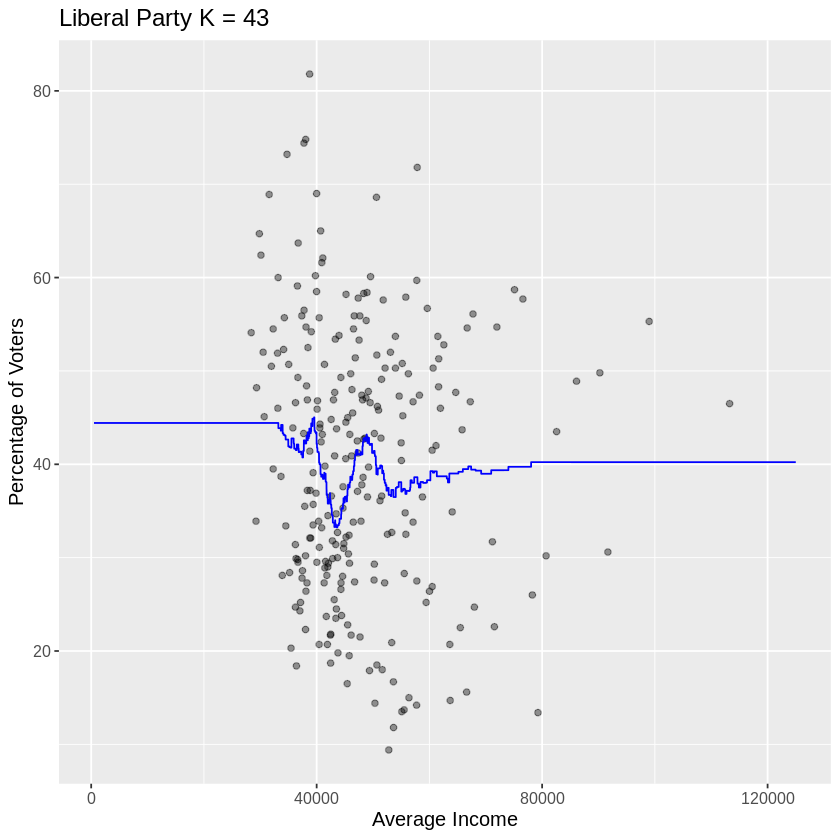

In [58]:
#

kmin <- Liberal_min |> pull(neighbors)

Liberal_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

Liberal_fit_test <- workflow() |>
  add_recipe(Liberal_recipe) |>
  add_model(Liberal_spec_test) |>
  fit(data = Liberal_training)

Liberal_summary_test <- Liberal_fit_test |>
  predict(Liberal_testing) |>
  bind_cols(Liberal_testing) |>
  metrics(truth = Percentage_of_Population_Voted, estimate = .pred) |>
  filter(.metric == 'rmse')

Liberal_summary_test

#

Liberal_preds <- tibble(Average_Income = seq(from = 500, to = 125000, by = 10))

Liberal_preds <- Liberal_fit_test |>
  predict(Liberal_preds) |>
  bind_cols(Liberal_preds)

plot_final_lib <- ggplot(Liberal_training, aes(x = Average_Income, y = Percentage_of_Population_Voted)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Liberal_preds, 
            mapping = aes(x = Average_Income, y = .pred), 
            color = "blue") +
  xlab("Average Income") +
  ylab("Percentage of Voters") +
  ggtitle(paste0("Liberal Party K = ", kmin)) + 
  theme(text = element_text(size = 12))

plot_final_lib



### NDP

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


! Fold1: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold2: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold3: preprocessor 1/1, model 1/1: 200 samples were requested but there were 200 rows in the data. 195 will...

! Fold4: preprocessor 1/1, model 1/1: 200 samples were requested but there were 204 rows in the data. 199 will...

! Fold5: preprocessor 1/1, model 1/1: 200 samples were requested but there were 204 rows in the data. 199 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,15.58772,5,0.3410399,Preprocessor1_Model001
2,rmse,standard,13.18092,5,0.1996476,Preprocessor1_Model002
3,rmse,standard,12.19950,5,0.4196959,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,rmse,standard,11.24344,5,0.3827809,Preprocessor1_Model198
199,rmse,standard,11.25049,5,0.3833432,Preprocessor1_Model199
200,rmse,standard,11.24089,5,0.3805072,Preprocessor1_Model200


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
44,rmse,standard,10.89099,5,0.2973711,Preprocessor1_Model044


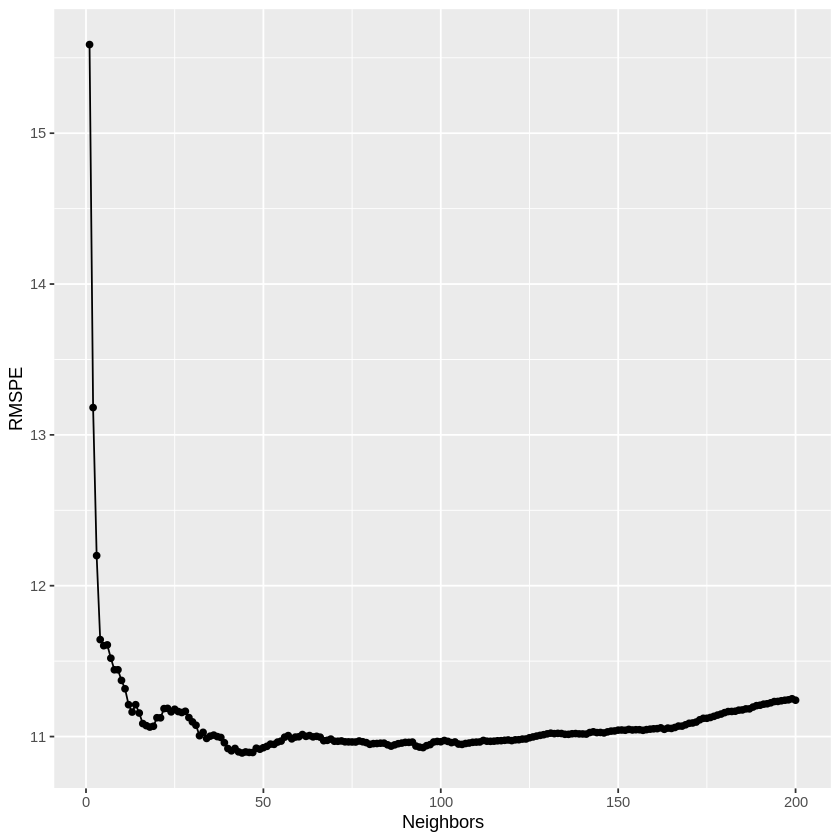

In [59]:
set.seed(200)

# Splitting into testing and training

NDP_split <- initial_split(NDP_data, prop = 0.75, strata = Percentage_of_Population_Voted)
NDP_training <- training(NDP_split)
NDP_testing <- testing(NDP_split)

#


NDP_recipe <- recipe(Percentage_of_Population_Voted ~ Average_Income, data = NDP_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

NDP_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

NDP_vfold <- vfold_cv(NDP_training, v = 5, strata = Percentage_of_Population_Voted)

NDP_wkflw <- workflow() |>
  add_recipe(NDP_recipe) |>
  add_model(NDP_spec)

NDP_wkflw


#

gridvals <- tibble(neighbors = seq(1,200))

NDP_results <- NDP_wkflw |>
  tune_grid(resamples = NDP_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

NDP_results

#

NDP_RMSPE_plot <- ggplot(NDP_results, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
xlab("Neighbors") +
ylab("RMSPE")

NDP_RMSPE_plot

# show only the row of minimum RMSPE
NDP_min <- NDP_results |>
  filter(mean == min(mean))

NDP_min



The smallest RMSPE occurs when K = 44.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10.66077


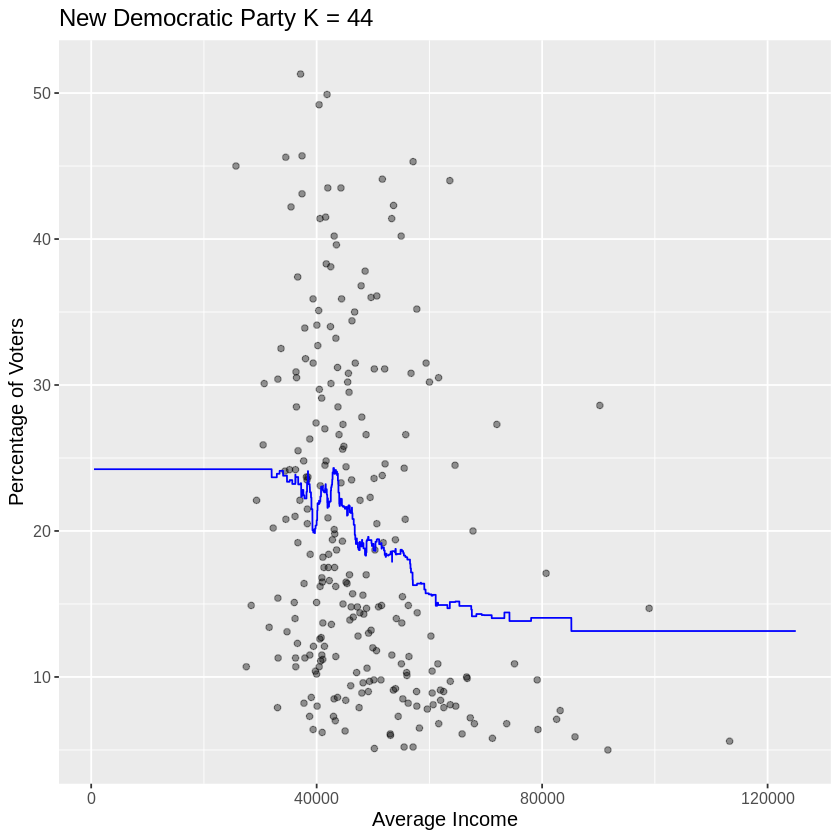

In [60]:
#

kmin <- NDP_min |> pull(neighbors)

NDP_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

NDP_fit_test <- workflow() |>
  add_recipe(NDP_recipe) |>
  add_model(NDP_spec_test) |>
  fit(data = NDP_training)

NDP_summary_test <- NDP_fit_test |>
  predict(NDP_testing) |>
  bind_cols(NDP_testing) |>
  metrics(truth = Percentage_of_Population_Voted, estimate = .pred) |>
  filter(.metric == 'rmse')

NDP_summary_test

#

NDP_preds <- tibble(Average_Income = seq(from = 500, to = 125000, by = 10))

NDP_preds <- NDP_fit_test |>
  predict(NDP_preds) |>
  bind_cols(NDP_preds)

plot_final_ndp <- ggplot(NDP_training, aes(x = Average_Income, y = Percentage_of_Population_Voted)) +
  geom_point(alpha = 0.4) +
  geom_line(data = NDP_preds, 
            mapping = aes(x = Average_Income, y = .pred), 
            color = "blue") +
  xlab("Average Income") +
  ylab("Percentage of Voters") +
  ggtitle(paste0("New Democratic Party K = ", kmin)) + 
  theme(text = element_text(size = 12))

plot_final_ndp



### GREEN

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,rmse,standard,3.843510,5,0.4046377,Preprocessor1_Model001
3,rmse,standard,4.517983,5,0.4947793,Preprocessor1_Model002
4,rmse,standard,4.266984,5,0.5951042,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
178,rmse,standard,3.803811,5,1.032924,Preprocessor1_Model177
179,rmse,standard,3.803054,5,1.033175,Preprocessor1_Model178
180,rmse,standard,3.802859,5,1.033735,Preprocessor1_Model179


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
148,rmse,standard,3.779048,5,1.035155,Preprocessor1_Model147


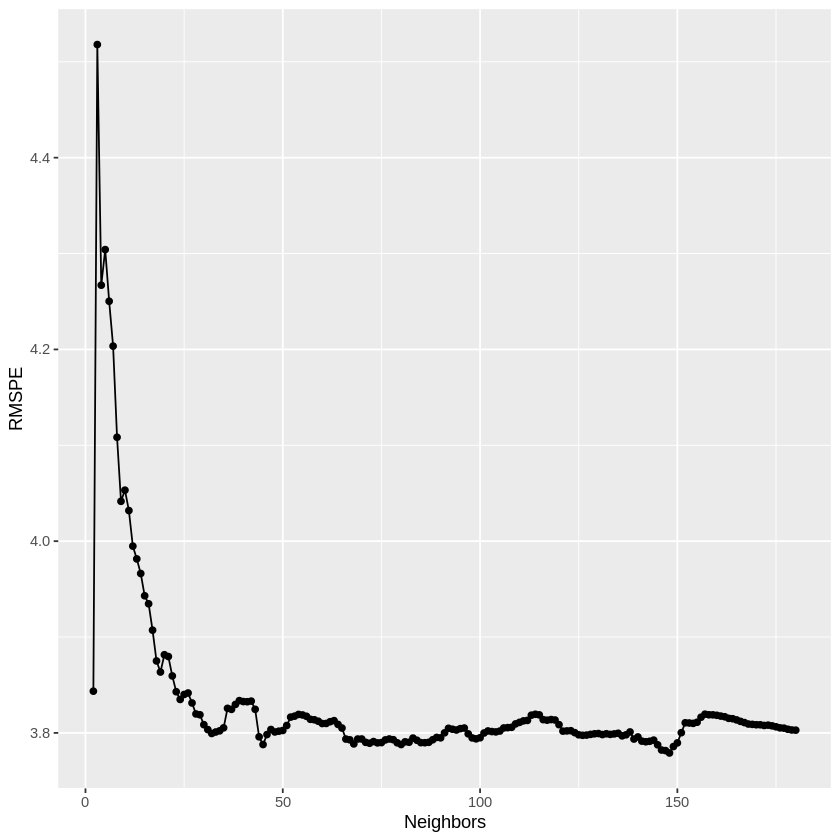

In [61]:
set.seed(200)

# Splitting into testing and training

Green_split <- initial_split(Green_data, prop = 0.75, strata = Percentage_of_Population_Voted)
Green_training <- training(Green_split)
Green_testing <- testing(Green_split)

#


Green_recipe <- recipe(Percentage_of_Population_Voted ~ Average_Income, data = Green_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Green_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

Green_vfold <- vfold_cv(Green_training, v = 5, strata = Percentage_of_Population_Voted)

Green_wkflw <- workflow() |>
  add_recipe(Green_recipe) |>
  add_model(Green_spec)

Green_wkflw


#

gridvals <- tibble(neighbors = seq(2,180))

Green_results <- Green_wkflw |>
  tune_grid(resamples = Green_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

Green_results

#

Green_RMSPE_plot <- ggplot(Green_results, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
xlab("Neighbors") +
ylab("RMSPE")

Green_RMSPE_plot

# show only the row of minimum RMSPE
Green_min <- Green_results |>
  filter(mean == min(mean))

Green_min


The smallest RMSPE occurs when K = 148.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.451578


Warning message:
“Removed 2 rows containing missing values (geom_point).”


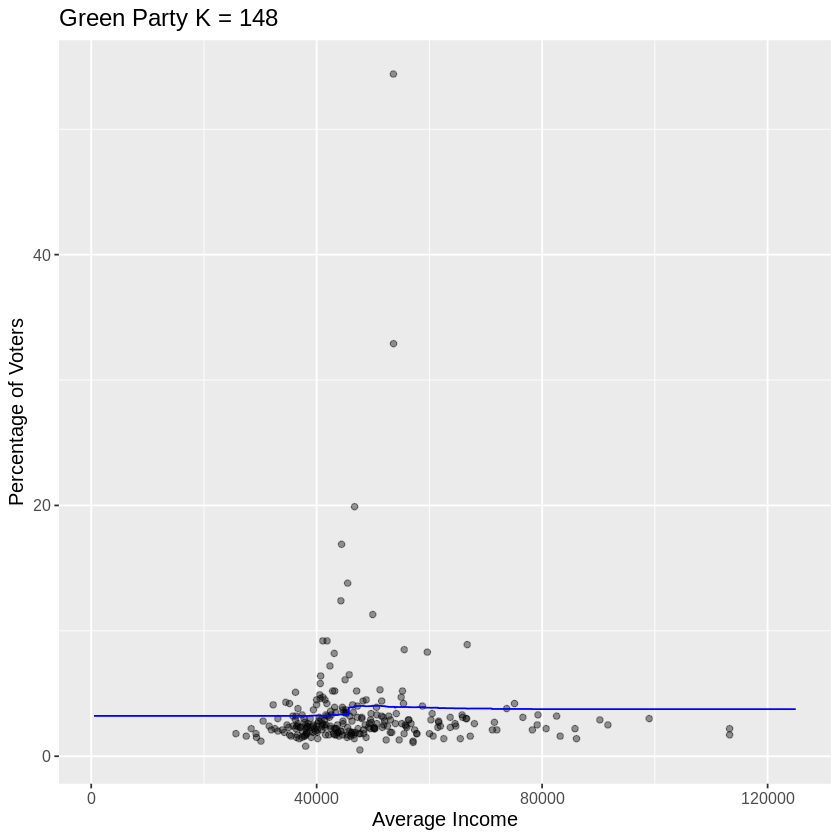

In [62]:
#

kmin <- Green_min |> pull(neighbors)

Green_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

Green_fit_test <- workflow() |>
  add_recipe(Green_recipe) |>
  add_model(Green_spec_test) |>
  fit(data = Green_training)

Green_summary_test <- Green_fit_test |>
  predict(Green_testing) |>
  bind_cols(Green_testing) |>
  metrics(truth = Percentage_of_Population_Voted, estimate = .pred) |>
  filter(.metric == 'rmse')

Green_summary_test

#

Green_preds <- tibble(Average_Income = seq(from = 500, to = 125000, by = 10))

Green_preds <- Green_fit_test |>
  predict(Green_preds) |>
  bind_cols(Green_preds)

plot_final_green <- ggplot(Green_training, aes(x = Average_Income, y = Percentage_of_Population_Voted)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Green_preds, 
            mapping = aes(x = Average_Income, y = .pred), 
            color = "blue") +
  xlab("Average Income") +
  ylab("Percentage of Voters") +
  ggtitle(paste0("Green Party K = ", kmin)) + 
  theme(text = element_text(size = 12))

plot_final_green



## PART III: INDIVIDUAL ANALYSIS

Warning message:
“Removed 1 rows containing missing values (geom_point).”


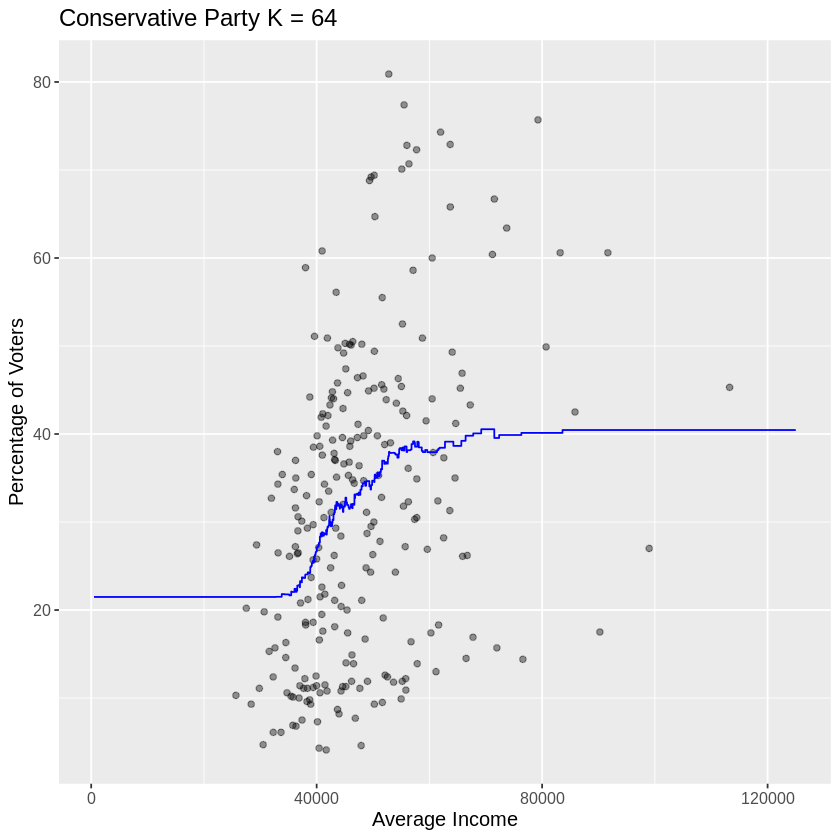

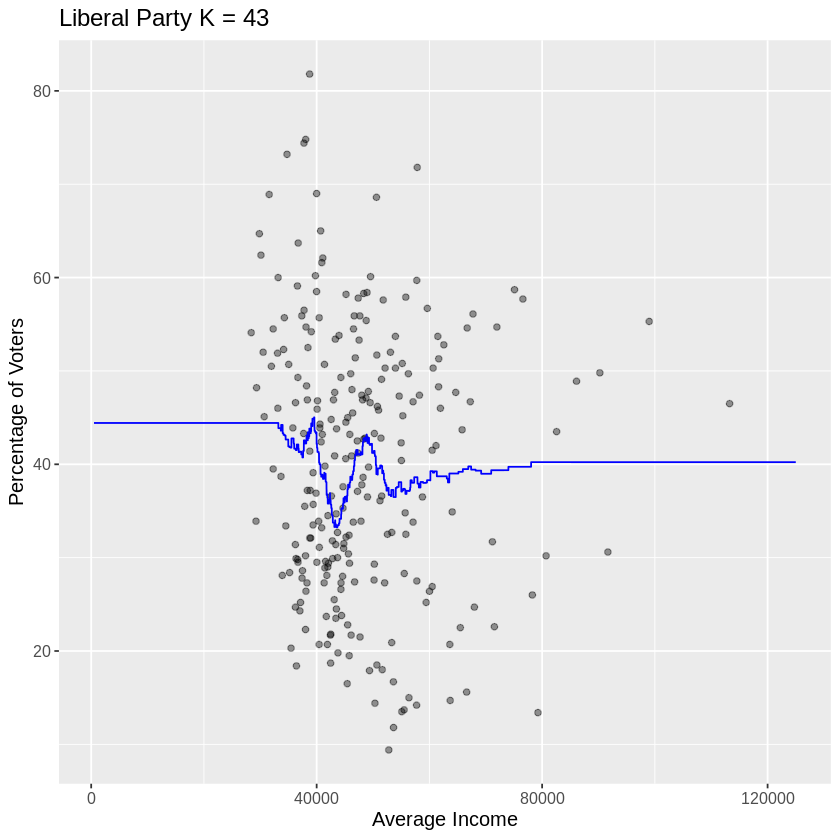

Warning message:
“Removed 2 rows containing missing values (geom_point).”


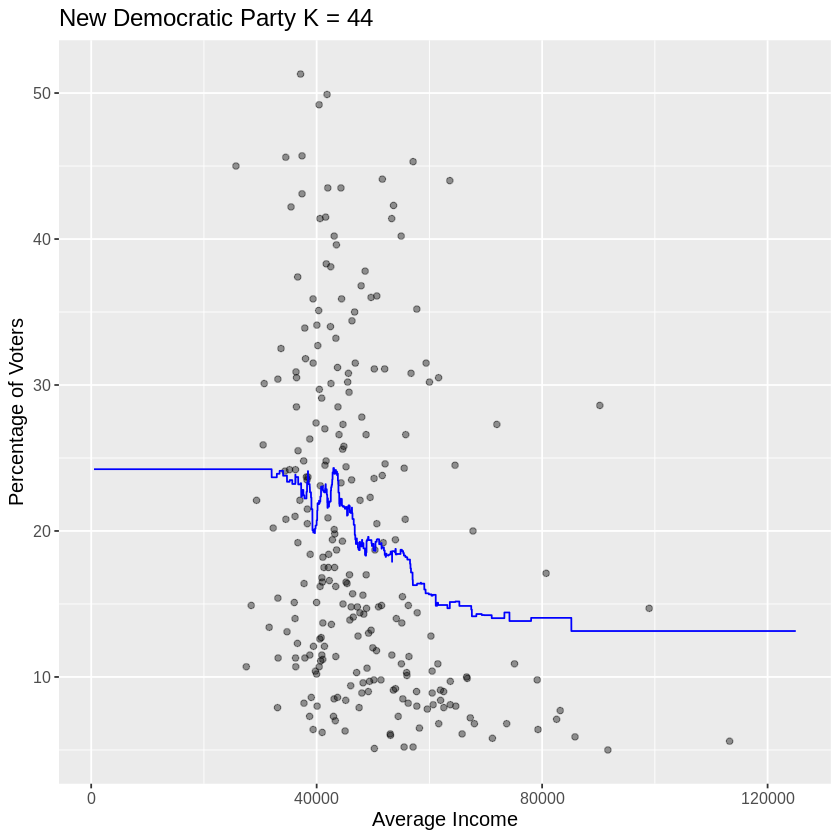

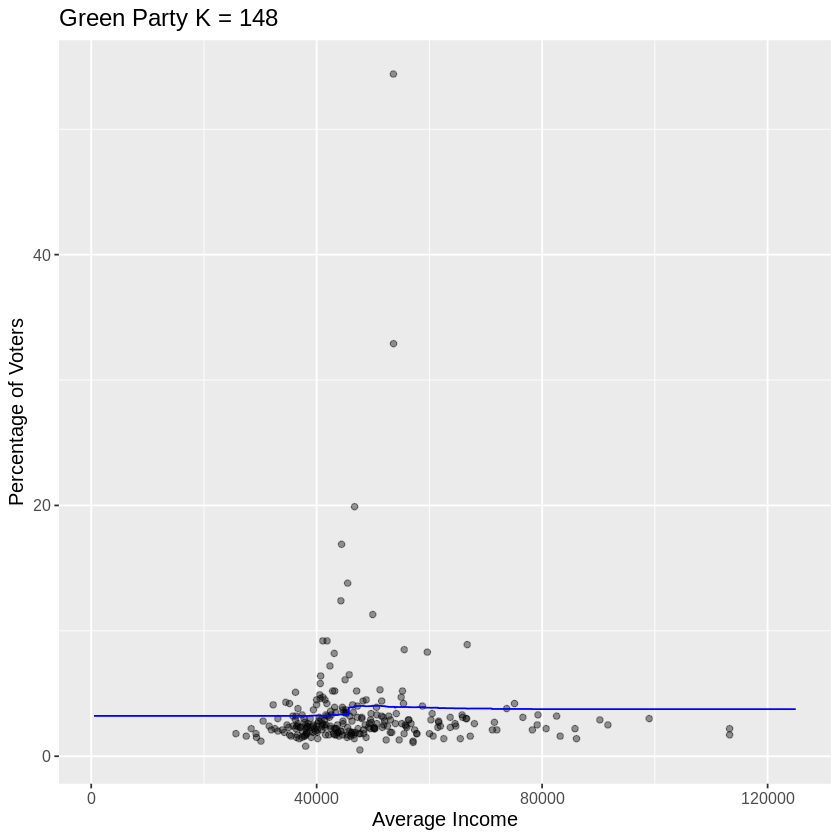

In [63]:
plot_final_con
plot_final_lib
plot_final_ndp
plot_final_green

Each scatterplot displays the observations of average income within the range of \\$25,000 to \\$112,000 based on the income data collected from the Government of Canada in 2015.

### Conservative Party Analysis

Warning message:
“Removed 1 rows containing missing values (geom_point).”


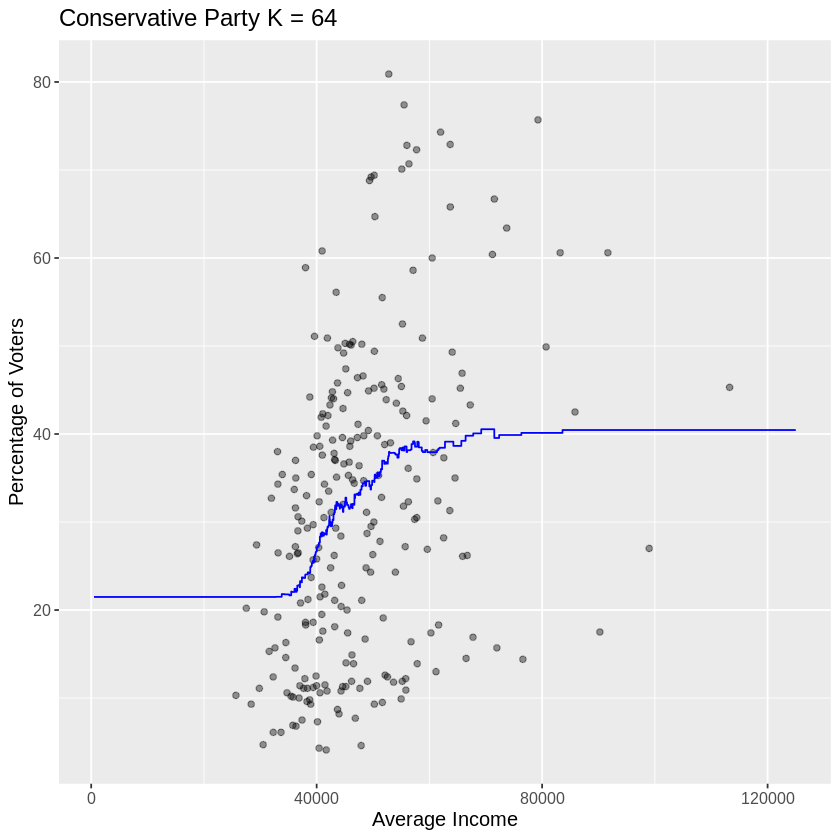

In [64]:
plot_final_con

The K-NN regression plot shows a percentage increase of approximately 19% in votes for the Conservative party as average income rose from \\$35,000 to \\$85,000. The scatter plot shows observations ranging from sub-5% levels to as high as over 80% of voters in electoral districts, and the observations’ shape portrays a weak positive correlation between income and voting percentage, which is reflected in the regression line.

The increase in voters as the average income range rises may be a result of the Conservative party’s policies on lower tax rates, less government regulation, and reduced government spending. Although lower taxes can also be beneficial to those who earn lower incomes, having less government intervention may lead to more expensive social programs that they may not be able to afford solely based on their salary. Thus, the possibility for higher earning citizens to vote for the Conservative party may be greater than for lower earning citizens.


### Liberal Party Analysis

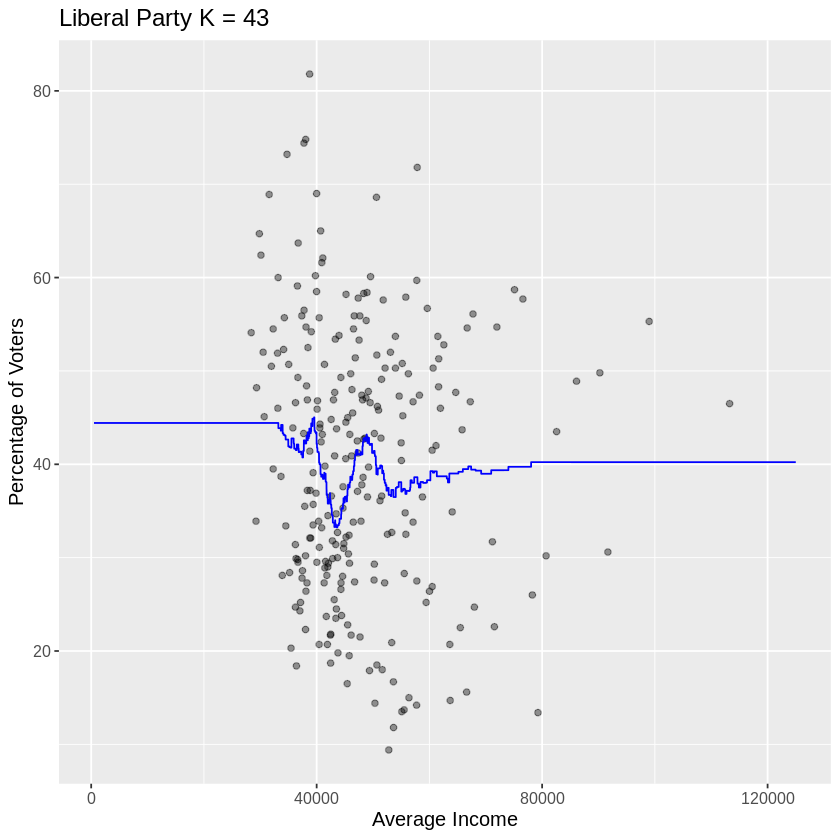

In [65]:
plot_final_lib

The K-NN regression plot for the Liberal Party differs from the previous plot as it doesn’t show an obvious increase or decrease in votes as income rose. When examining the graph, we can see that the overall percentage of voters decreased by around 5% as incomes rose from \\$35,000 to \\$85,000, but the regression line became erratic in the centre of the data where placement of observations varied the most. Unlike the Conservative Party, percentage levels do not dip lower than slightly under 10%, but it similarly peaks at slightly above 80%. The observations’ shape does not very obviously portray a strong correlation between income and voting percentage, however we can notice a weak downward trend in the data, which is reflected in the regression line.

A potential reason this trend may be seen can be because the Liberal party is the most central of the top 3 parties. Therefore those who earn a higher wage may value the social views of the Liberal party more than the Conservative party and sacrifice any financial benefits that they may receive from supporting other parties. Additionally, those who may benefit financially from the NDP party may not agree with their social beliefs, and choose to vote for the Liberals who are not as left-leaning.


### New Democratic Party Analysis

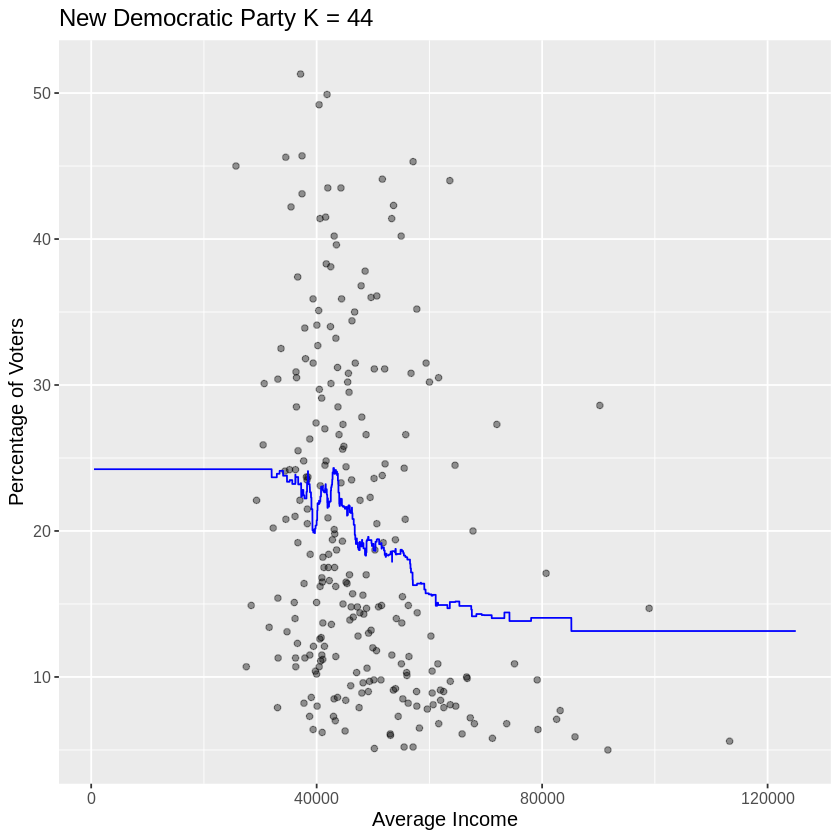

In [66]:
plot_final_ndp

The K-NN regression plot shows a percentage decrease of around 11% in votes for the NDP as average income rose from \\$35,000 to \\$85,000. Unlike both of the previous parties, NDP percentage levels do not go higher than slightly above 50%, however it does not dip below 5%. The observations form a shape that portrays a relatively stronger negative correlation (in comparison to the previous plots) between average income levels and percentage of voters. The plot shows that only 5% of the (on average) richest electoral district voted for the NDP, while both the Liberal and Conservative parties each received around 46% of votes from that district. 

A possible explanation for this could be due to the idea that the NDP is more left-leaning, where they believe in a progressive taxing model, and an increase in government intervention. People with a higher income may not feel inclined to vote for the NDP because of these tax policies which target them according to income earned. People with a lower income may feel better represented by the NDP because they may provide more government intervention to make it more equitable in society for them, such as paid social programs, or more healthcare benefits.


### Green Party Analysis

Warning message:
“Removed 2 rows containing missing values (geom_point).”


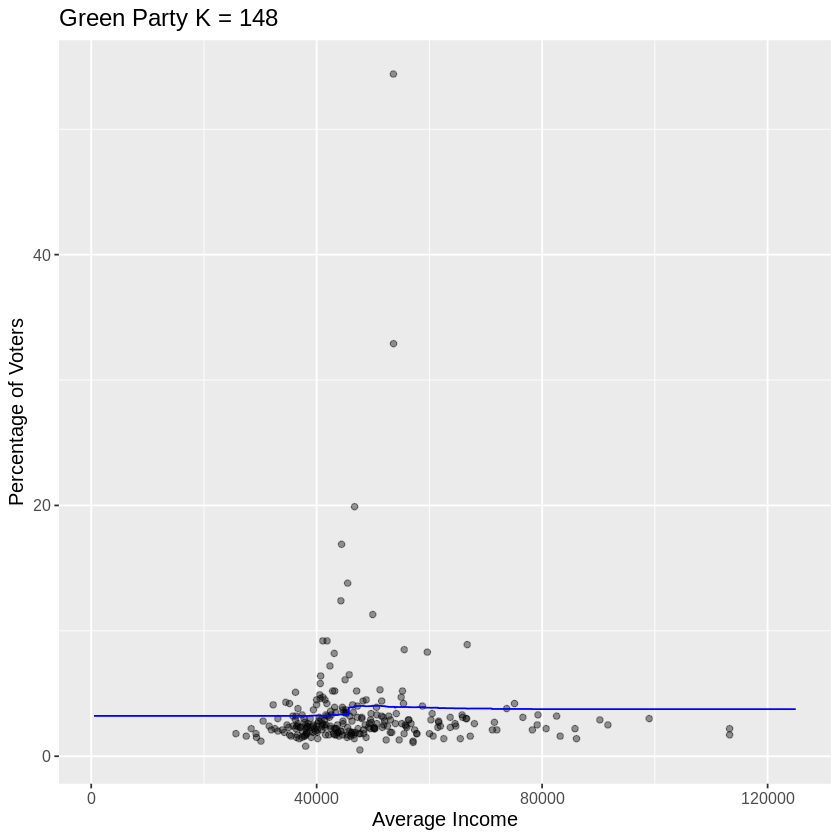

In [67]:
plot_final_green

The K-NN regression plot of the Green Party shows a percentage increase of around 1% in votes as average income rose from \\$35,000 to \\$85,000. Their lowest percentage of voters lies around just above 0% with their highest being around 57%. This graph shows almost little to no correlation between the increase of average income and percentage of voters as the slight increase at an average income of $42,000 for the K-NN regression line is likely due to the data points that do not lie within a reasonable range of the other data points, which we could call outliers. 

This horizontal regression line can be explained by its low popularity, regardless of cultural, social or political beliefs. Since consituency representatives are chosen by a majority vote system, people may not vote for the Green Party due to the lower probability of winning and to avoid casting “wasted votes”. Due to the possibility of casting a wasted vote, many voters may find it more rational to vote for another party they believe have a better chance of winning despite how much they agree with the Green Party. 

## Part IV: Discussion + Results

As shown in the scatter plots of the Liberal Party, Conservative Party, New Democratic Party and Green Party one significant observation we made was the drastic differences between each party and their income level to vote relationship. In our Conservative Party graph there is a positive relationship between the increase in average income level and the overall increase in votes. Similarly, the NDP graph shows a relationship between the increase in average income level and an overall decrease in votes. For the Liberal Party there was a more unclear relationship between the average income level and votes as there was a drastic drop and rise in votes between $40,000 and $50,000. Other than that the relationship between the two variables show a steady relationship. Unfortunately for the Green Party graph, due to the lower amount of data our KNN regression line showed no indication of a relationship between income level and voter preference and most votes were concentrated between the incomes of \\$30,000 and \\$50,000. 

**Expected outcomes and significance:**

*What did you expect to find?*

One of the trends we were expecting was that as the average income rate decreased, voter preference would shift to parties which focus on policies that benefit the low and middle income families. Similarly, as the average income rate increased, voter preference would shift to parties who have less focus on these policies.

For example, the Conservative Party is known to promote the reduction of income tax, which is typically supported by higher income groups. On the other hand, the NDP promises to “[ensure] that large profitable corporations pay a fair share of taxes” and “tax reductions to help the middle class, working families, and the poor” (NDP, 2016) which may be opposed by large business owners and the wealthy.

We also expect to notice that when we compare the parties, the Liberal and Conservative party will have more data samples which may contribute to a more reliable analysis of income to vote trends. With this in mind we expect to see more changes on the KNN nearest neighbour line in a major party such as the Liberal Party when compared to smaller parties such as the Green Party. 


*What impact could such findings have?*

Using these findings, we may be able to predict the possible outcomes of an election per electoral district based on its income level. This data could also be used to help parties plan their approach to gaining more seats by targeting the income demographics who do not typically vote for them. We can also identify a trend between income and party preference, allowing us to figure out if specific income demographics believe a party could benefit them more than others. 
Conducting this research will also be helpful for the government to predict the public reaction to new bills or changes to policies surrounding the topics of income distribution, minimum wage, taxes, immigration and labour. 


*What future questions could this lead to?*

In this project we only explored one estimator to voter choice, income, if there is a relationship between income level and voter choice as we predict there may be other predictors that can explain the deciding factors for popular political parties. This could lead to questions about which parties which receive the most support from high and low earning households. Do the rich prefer certain parties because their legislation focuses on protecting their wealth or is it because these parties represent their moral and ethical views? 

Some ways we can expand or add to this research is if we look into social inequalities that may affect voter participation. Further research on gender differences, immigration status, and socioeconomic inequalities may help with predictions and solutions which can lead to maximized votes from all diversity groups in Canada. If we were to add onto this project we would focus on the effect of gender inequity and how the wage gap and opportunities (or lack of) affect the decisions to support certain political parties.

### Concluding Remarks

 In summary, there appears to be a direct relationship between the average income levels of constituencies and their voting preferences. This supports our prediction that as the income level rises or falls, certain parties such as the Conservative Party and New Democratic Party gain popularity. We recognize that the data we used is within a limited scope of the 2015 federal election and to expand on this research in the future we must also consider the data from all previous and future federal elections. Another way we can expand on this research is to consider other socioeconomic and identity factors which will help reduce the residual  error. 


### Works Cited

Polacko, M. (2020). Party Positions, Income Inequality, and Voter Turnout in Canada, 1984-2015. American Behavioral Scientist, 64(9), 1324–1347. https://doi.org/10.1177/0002764220941238 

Hersh, E. & Nall, C (2016). The Primacy of Race in the Geography of Income-Based Voting: New Evidence from Public Voting Records. American Journal of Political Science Vol. 60, No. 2. 289-303. https://www.jstor.org/stable/24877622 

Government of Canada (2015). Federal Electoral District Tax Statistics (FEDS) (tax year 2015). Open Government Portal. https://open.canada.ca/data/en/dataset/90fed920-c32d-4a41-8f26-53392eb78671  

Government of Canada (2015). 42nd general election: Official Voting Results - Table 12: List of candidates by electoral district and individual results. Open Government Portal. https://open.canada.ca/data/en/dataset/775f3136-1aa3-4854-a51e-1a2dab362525/resource/14b9eb9e-495e-452a-8ff1-b0f9670a504f  

Policy declaration - Conservative Party of Canada. Conservative Party of Canada. (2018). Retrieved from https://cpcassets.conservative.ca/wp-content/uploads/2020/10/15090948/9f7f204744e7480.pdf

Policy of the New Democratic Party of Canada. New Democratic Party. (2016). Retrievedfrom https://xfer.ndp.ca/2017/Documents/2016_POLICY-EN.pdf 
